In [1]:
import re

import pandas as pd
pd.set_option('display.max_rows', None)

import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv("data/noticias-etiquetadas2.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.drop(df[df['Topic'] == -1].index, inplace=True)


def limpiar_titulo(df):
    for index, row in df.iterrows():
        title = row['title']
        split_title = title.split('-')
        cleaned_title = split_title[0].strip()  # Elimina espacios en blanco alrededor del texto
        df.at[index, 'title'] = cleaned_title

limpiar_titulo(df)


In [2]:
df.drop_duplicates(subset=['title'], inplace=True)

print("Número de noticias en los meses Enero y Febrero 2022: ", len(df))
df.head()

Número de noticias en los meses Enero y Febrero 2022:  1313


,id_news,country,media_outlet,url,title,text,date,cities,keywords,Document,Topic,Probability
1,47719086.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/25/trac...,Tractocamión volcó esta mañana en puente Lloll...,El accidente se produjo pasadas las 06:00 AM y...,2022-01-25,[],"['puente', 'victimas', 'bomberos', 'semi remol...",tractocamion volco esta manana en puente lloll...,0,1.000000
2,47719110.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/27/gobe...,Gobernadores Regionales de Los Ríos y Los Lago...,La instancia buscó generar un trabajo colabora...,2022-01-27,"['los lagos', 'rio bueno']","['gobernadores', 'ambas regiones', 'puyehue', ...",gobernadores regionales de los rios y los lago...,15,0.839193
3,47700339.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Alegan inocencia de acusadas por cruel asesina...,La defensa de las dos mujeres acusadas de enca...,2022-01-05,['valdivia'],"['dos acusados', 'helena bustos', 'dos mujeres...",alegan inocencia de acusadas por cruel asesina...,46,1.000000
5,47700426.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Los Lagos tendrá su primera Corporación Munici...,Con la aprobación del Concejo Municipal a la p...,2022-01-03,['los lagos'],"['municipios', 'corporacion', 'lagos', 'presid...",los lagos tendra su primera corporacion munici...,3,0.534853
8,47686849.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2022/01/27/en-p...,En prisión preventiva quedó un hombre formaliz...,El fiscal Gonzalo Valderas comunicó a Javier C...,2022-01-27,['valdivia'],"['cocaina', 'delitos', 'funcionarios', 'cargo'...",en prision preventiva quedo un hombre formaliz...,5,1.000000


In [3]:
clusters = pd.read_csv("data/clusters2.csv")
clusters.drop(columns=["Unnamed: 0", "Name", "Representative_Docs"], inplace=True)
clusters.drop(clusters[clusters['Topic'] == -1].index, inplace=True)


def get_representation(doc):
    pattern = r"'([^']*)'"
    matches = re.search(pattern, doc)
    if matches:
        return matches.group(1)
    return None

clusters["Representation"] = clusters.Representation.apply(get_representation)

In [4]:
clusters

,Topic,Count,Representation
1,0,155,Accidentes en ruta en Chile
2,1,73,Proyecto de vivienda en Chile
3,2,72,Incendio en la Región Metropolitana
4,3,68,Crisis de niebla en Valparaíso
5,4,63,Teatro en Chile
6,5,47,Drogas en Chile
7,6,40,Desafíos de la gestión de obras públicas
8,7,39,Comercio y acción empresarial en Chile
9,8,36,Desafíos de la Educación
10,9,36,Tormentas electricas en Chile


In [5]:
def extract_keywords(string):
    pattern = r"'([^']*)'"
    matches = re.findall(pattern, string)
    return matches

## 1. Análisis de noticias en cluster mediante conexiones a través de sus keywords

In [6]:
def create_graph(topic_df):
    graph = nx.Graph()
    titles_keywords = {}

    for index, row in topic_df.iterrows():
        title = row['id_news']
        keywords = set(extract_keywords(row['keywords']))
        titles_keywords[title] = keywords
        graph.add_node(title)

    edges = [(title1, title2, {'keywords': keywords1.intersection(keywords2)})
             for title1, keywords1 in titles_keywords.items()
             for title2, keywords2 in titles_keywords.items()
             if title1 != title2 and keywords1.intersection(keywords2)]

    graph.add_edges_from(edges)
    return graph

def determine_edge_weights(graph):
    edge_weights = nx.get_edge_attributes(graph, 'keywords')
    nx.set_edge_attributes(graph, {edge: len(keywords) for edge, keywords in edge_weights.items()}, 'weight')

def visualize_graph(graph, topic_df, cluster_num):
    plt.figure(figsize=(12, 9))
    pos = nx.kamada_kawai_layout(graph)

    # Calculate degree centrality for node sizes
    node_sizes = [500 * nx.degree_centrality(graph)[node] for node in graph.nodes()]

    # Customize node and label styles
    node_colors = ['skyblue' if node in topic_df['id_news'].values else 'lightgray' for node in graph.nodes()]
    node_border_color = ['black' if node in topic_df['id_news'].values else 'gray' for node in graph.nodes()]

    edge_weights = nx.get_edge_attributes(graph, 'weight')
    edge_labels = nx.get_edge_attributes(graph, 'keywords')
    if edge_weights:  # Check if there are edge weights
        edge_colors = list(edge_weights.values())  # Get the edge weights

        nx.draw_networkx_edges(graph, pos, alpha=0.5, edge_cmap=plt.cm.Blues, edge_vmin=min(edge_colors), edge_vmax=max(edge_colors))
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6, font_color='black')
    
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, edgecolors=node_border_color, alpha=0.8)
    nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='normal')

    # Add colorbar for edge weights
    if edge_weights:  # Check if there are edge weights
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
        plt.colorbar(sm)

    plt.title("Grafo de keywords compartidos entre noticias del mismo clúster - Clúster: {}".format(clusters.loc[clusters.Topic == cluster_num].Representation))
    plt.axis('off')
    plt.show()



def shared_keywords_of_news_in_cluster(cluster_num):
    topic_df = df[df['Topic'] == cluster_num]
    graph = create_graph(topic_df)
    determine_edge_weights(graph)
    visualize_graph(graph, topic_df, cluster_num)


Para este análisis nos concentraremos en un tópico específico: N°21 - "Financiamiento Municipal en Chile"


In [7]:
pd.set_option('display.max_colwidth', 255)

df.loc[df.Topic == 21][['title', 'keywords']]

,title,keywords
73,En Panguipulli invertirán $ 615 millones en obras de pavimentación participativa,"['urbanismo proyecto', 'millones', 'jazmines lago pellaifa', 'calidad', 'inversion']"
161,"Anuncian pavimentación de 12,5 kilómetros de calles, pasajes y veredas de Los Ríos","['rios ignacio', 'urbanismo', 'pesos', 'mil millones', 'inversion']"
166,"Alcaldes, concejales y funcionarios municipales de todo el país se reunirán en Valdivia","['municipalidades', 'chilecompras servicio', 'hotel', 'impuestos', 'carampangue']"
197,Cehum y municipio laguino proyectan generar plan piloto para el cuidado del agua,"['aguas', 'plan piloto', 'municipalidad', 'deficit', 'reunion']"
262,La Unión: alcalde y dirigentas sostienen reunión con ministra de Transportes y Telecomunicaciones por barcaza de Llancacura,"['alcaldes', 'santiago', 'viajes', 'reunion', 'telecomunicaciones']"
347,Valdivia: autoridades y funcionarios municipales de todo el país se reunirán para abordar el escenario de las Finanzas Municipales,"['municipalidades', 'presupuesto', 'chilecompras servicio', 'hotel', 'carampangue']"
401,"Corporación Municipal anuncia auditoría interna para evaluar gestión administrativa, financiera y contable","['administracion', 'presupuestarios', 'transparencia', 'seis meses', 'reunion']"
653,"Alcaldes, concejales y funcionarios municipales de todo el país se reunirán en Valdivia para abordar el complejo escenario de las Finanzas Municipales","['municipalidades', 'chilecompras servicio', 'presupuesto', 'hotel', 'carampangue']"
661,Gobernador Díaz se reunió con representantes del sector productivo de Contulmo,"['gobernador', 'sector', 'reunion', 'vivienda', 'biobio']"
735,Municipalidad de Panguipulli y la UFRO firmaron convenio de colaboración,"['municipalidad', 'iniciativas proyectos', 'tambien', 'cursos', 'macrozona']"


/tmp/ipykernel_14604/826333970.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


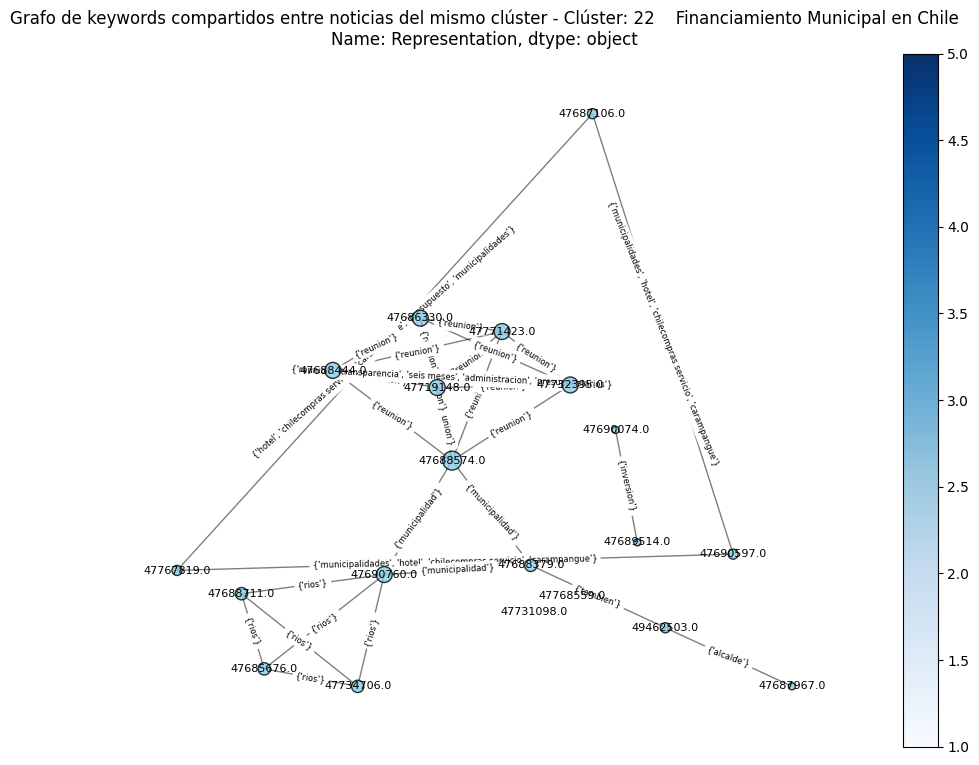

In [8]:
graph = shared_keywords_of_news_in_cluster(cluster_num=21)
graph

In [9]:
def sort_nodes_by_degree_centrality(graph):
    # Calcula el grado de centralidad de cada nodo
    degree_centralities = nx.degree_centrality(graph)
    
    # Ordena los nodos según su grado de centralidad de forma descendente
    sorted_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)
    
    return sorted_nodes

# Create the graph
graph = create_graph(df[df['Topic'] == 21])

# Sort nodes by degree centrality
sorted_nodes = sort_nodes_by_degree_centrality(graph)

# Use the sorted nodes for further analysis or customization
print("Sorted Nodes:", sorted_nodes)

Sorted Nodes: [47688574.0, 47719148.0, 47732395.0, 47771423.0, 47688444.0, 47690760.0, 47686330.0, 47688379.0, 47688711.0, 47685676.0, 47734706.0, 47690597.0, 47687106.0, 47767819.0, 49462503.0, 47689514.0, 47690074.0, 47687967.0, 47731098.0, 47768559.0]


/tmp/ipykernel_14604/826333970.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


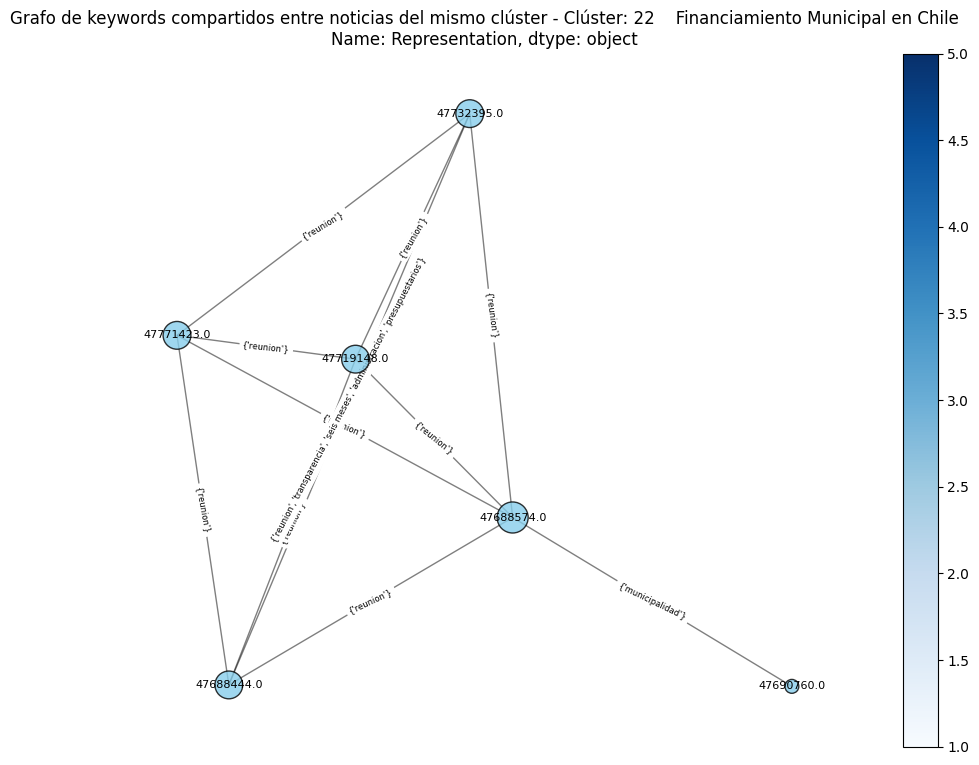

In [10]:
ids = sorted_nodes[:6]
filtered_rows = df[df['id_news'].isin(ids)]
graph = create_graph(filtered_rows)
determine_edge_weights(graph)
visualize_graph(graph, filtered_rows, 21)

/tmp/ipykernel_14604/826333970.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


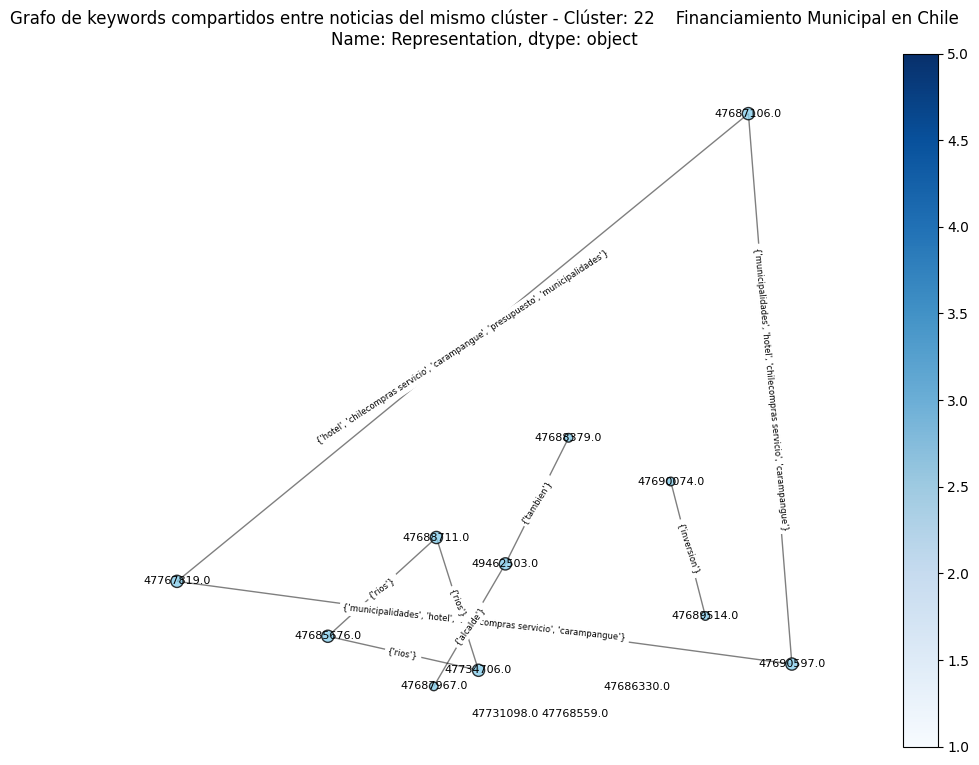

In [11]:
ids = sorted_nodes[6:]
filtered_rows = df[df['id_news'].isin(ids)]
graph = create_graph(filtered_rows)
determine_edge_weights(graph)
visualize_graph(graph, filtered_rows, 21)

## 2. Análisis de sectores y sus clusters considerando las keywords de sus noticias

#### Agrupación de clusters en sectores de interés

- Grupo 1: Salud
[0, 3, 5, 12, 17, 24, 25, 26, 31, 35, 43, 52, 54, 55]

- Grupo 2: Economía y Negocios
[1, 6, 7, 8, 11, 18, 21, 22, 28, 49, 50, 61]

- Grupo 3: Medio Ambiente
[2, 10, 15, 9, 19, 20, 34, 62, 63, 64]

- Grupo 4: Educación
[4, 8, 16]

- Grupo 5: Otros
[14, 13, 23, 30, 27, 29, 32, 33, 36, 46, 47, 48, 56, 57, 58, 60, 65, 66, 67]

In [12]:
# Crear una función para combinar listas sin duplicados
def combine_lists(list_of_lists):
    combined_list = list(set([item for sublist in list_of_lists for item in sublist]))
    return combined_list

# Crear una lista de listas de keywords por cluster
keywords_by_cluster = []
for cluster_num in clusters['Topic']:
    list_of_lists = []
    for elem in df.loc[df.Topic == cluster_num, 'keywords'].tolist():
        list_of_lists.append(extract_keywords(elem))
    combined_list = combine_lists(list_of_lists)
    keywords_by_cluster.append(combined_list)

# Agregar la columna 'keywords' al DataFrame clusters
clusters['keywords'] = keywords_by_cluster

In [44]:
salud = [0, 3, 12, 17, 24, 25, 26, 31, 35, 43, 52, 54, 55, 64]
economia = [1, 6, 7, 8, 11, 18, 21, 22, 28, 49, 50, 61]
medio_ambiente = [2, 10, 15, 9, 19, 20, 34, 62, 63]
educacion = [4, 8, 16]

clusters_salud = clusters[clusters['Topic'].isin(salud)]
clusters_economia = clusters[clusters['Topic'].isin(economia)]
clusters_medio_ambiente = clusters[clusters['Topic'].isin(medio_ambiente)]
clusters_educacion = clusters[clusters['Topic'].isin(educacion)]

sectores = [clusters_salud, clusters_economia, clusters_medio_ambiente, clusters_educacion]    

In [45]:
clusters_medio_ambiente

,Topic,Count,Representation,keywords
3,2,72,Incendio en la Región Metropolitana,"[vicepresidente, ambos focos, comunas, matorrales, retroexcavadora, helicoptero participo, sector puente, lunes, viernes, gas, kilometros, esquina, futrono, congestion, magnitud, asfalto, incendio, voluntarios, once personas, siete encapuchados, pisci..."
10,9,36,Tormentas electricas en Chile,"[horas, normalidad, temperatura, viento puelche, meteorologica, estado, onemi, alerta, verano, emergencias, conectividad, tambien, lluvias, peso, comunas cordilleranas, ecosistema, semana, nudos, sectores, essalayudaessalcl, region, sector, cuatro com..."
11,10,35,Incendios forestales en Chile,"[horas, arauco aeronaves, director, antenas, viviendas, ataque, incendios, combatio cuatro incendios, casino, lunes, hora noticia, brigadistas, incendio, voluntarios, cuatro incendios, eucaliptos, contratistas, tormenta, eucaliptos tres hectareas, viv..."
16,15,29,Riesgos y desafíos de agua potable en Chile,"[ampliacion, comunas, viernes, deuda, riesgos, core, desarrollo, municipalidades, aumentos, equipo, sector, agricultoras, normas, dos camiones, sequia, calendario, puyehue, reunion, educacion servicios, aumento, camiones, fndr, expectativas, proyecto ..."
20,19,28,Desaparición de dos niños en la comuna de Union,"[horas, audiencia, union, tribunales, violacion, villalobos, cargo, lunes, hospital, profesiones titulares, ilicitos, nueve pacientes mujeres, ocho victimas, peso punitivo, presidio, beatriz, causales, feminista, protocolos, cannabis, calidad, muerte,..."
21,20,26,La política municipal de transporte en Valparaíso,"[pago, comunas, viernes, uniforme, medio ambiente, consultas ciudadanas, viviendas oficinas, yoga, ferrocarriles, protocolos, formulario, equipo, sector centro, mop, vendedores, celebracion, alerces, botellas, hoteleros, escuela proyecto, ortesis, reu..."
35,34,19,El servicio de la electricidad en Chile,"[horas, fibra, suministro, viento puelche, viento, lunes, camion, cables, arboles, trabajo remoto, plaza, cable, maihue, lago, horario, cliente, asfalto, media tension, electricidad, usuarios, villas, colaboradores, clientes pablo, energia, paillaco, ..."
63,62,11,Desigualdad e inseguridad ambiental en Chile,"[termitas, microcuenca, villalobos, tribunal, pandemia, cauce, mocho choshuenco, tambien, reserva, lago, urbanismo serviu, abejas pecoreadoras, vivienda, inspeccion, miles, glaciar, prejuicio existio, agroquimicos, ministra, tribunal decrete tres medi..."
64,63,11,Incendio en Rio Bueno,"[horas, vicepresidente, capellan, saldo dos viviendas, ataque, fuego, murillo rescato, hospital, rahue, incendio, romeria bomberos, voluntarios, vivienda, tristeza, cementerio, dormia, sector, bomberos, joven, lagos, puente, rios, causas, funeral, med..."


In [46]:
from collections import Counter

def generate_graph_from_dataframe(dataframe):
    # Crear el grafo
    graph = nx.Graph()

    # Iterar sobre los tópicos del DataFrame
    for topic, keywords_list in zip(dataframe['Topic'], dataframe['keywords']):
        # Crear una lista única de todas las keywords de la lista de keywords
        all_keywords = []
        for keywords in keywords_list:
            all_keywords.append(keywords)
        

        # Eliminar duplicados
        unique_keywords = list(set(all_keywords))        
        unique_keywords = [keyword for keyword in unique_keywords if len(keyword) > 7]

        # Agregar el nodo del tópico al grafo
        graph.add_node(topic, keywords=unique_keywords)

        # Conectar el tópico con los tópicos existentes que tienen keywords en común
        for existing_topic, existing_keywords in graph.nodes(data='keywords'):
            if existing_topic != topic:  # Evitar conexión consigo mismo
                common_keywords = set(unique_keywords).intersection(existing_keywords)
                if common_keywords:
                    graph.add_edge(topic, existing_topic, keywords=common_keywords)

    # Visualizar el grafo
    pos = nx.kamada_kawai_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
    edge_labels = nx.get_edge_attributes(graph, 'keywords')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

    # Mostrar el grafo
    plt.title("Relación de tópicos mediante keywords")

def distribucion_keywords(dataframe):    
    merged_list = []

    for sublist in dataframe.keywords.tolist():
        merged_list.extend(sublist)


    # Calcular la frecuencia de las palabras
    word_frequency = Counter(merged_list)

    # Filtrar las keywords cuyo contador es igual a 1
    filtered_keywords = {word: count for word, count in word_frequency.items() if count > 1}

    # Ordenar las palabras y sus frecuencias en orden descendente
    sorted_word_frequency = sorted(filtered_keywords.items(), key=lambda x: x[1], reverse=True)

    # Extraer las palabras y sus frecuencias ordenadas
    words = [word for word, freq in sorted_word_frequency]
    frequencies = [freq for word, freq in sorted_word_frequency]

    # Graficar la distribución de palabras
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(words)), frequencies)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(range(len(words)), words, rotation=90)
    plt.title('Distribución de palabras por frecuencia')

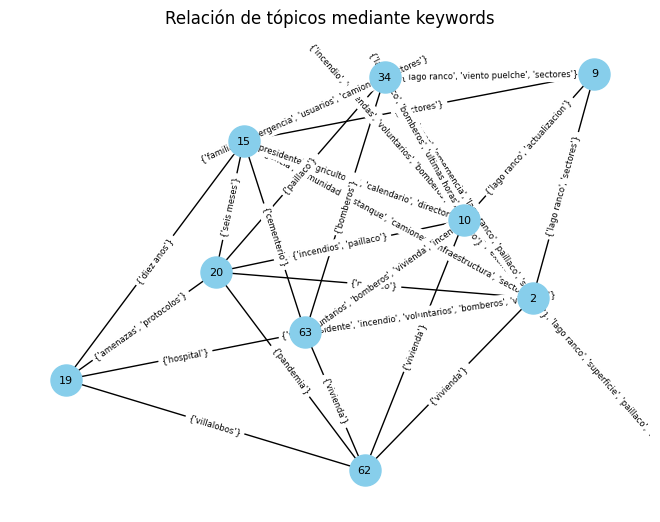

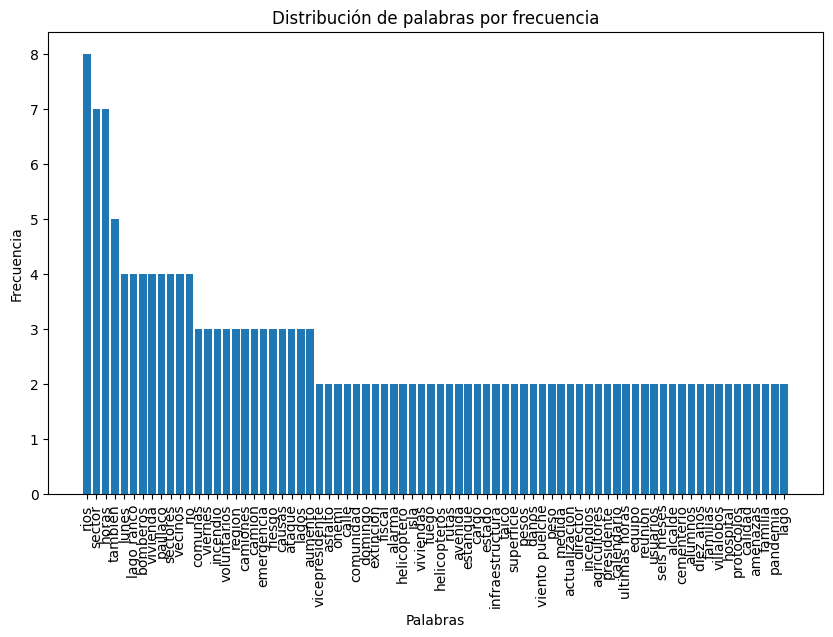

In [47]:
generate_graph_from_dataframe(clusters_medio_ambiente)  # Llamar a la función para generar el gráfico
distribucion_keywords(clusters_medio_ambiente)  # Llamar a la función para generar el gráfico

## 3. Análisis de sector vs sector (salud vs medioambiente)


In [77]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un nuevo grafo
grafo = nx.Graph()

# Agregar nodos del dataframe clusters_medio_ambiente (verdes)
for i, fila in clusters_medio_ambiente.iterrows():
    topic = fila['Topic']
    keywords = fila['keywords']
    grafo.add_node(topic, color='green', keywords=keywords)

# Agregar nodos del dataframe clusters_educación (rojos)
for i, fila in clusters_educacion.iterrows():
    topic = fila['Topic']
    keywords = fila['keywords']
    grafo.add_node(topic, color='red', keywords=keywords)

# Agregar aristas entre nodos según las condiciones
for nodo1, attr1 in grafo.nodes(data=True):
    color1 = attr1['color']
    keywords1 = attr1['keywords']
    
    for nodo2, attr2 in grafo.nodes(data=True):
        color2 = attr2['color']
        keywords2 = attr2['keywords']
        
        if color1 != color2 and any(keyword in keywords2 for keyword in keywords1):
            grafo.add_edge(nodo1, nodo2)

# Obtener colores y keywords de los nodos
colores_nodos = [attr['color'] for _, attr in grafo.nodes(data=True)]
keywords_nodos = [attr['keywords'] for _, attr in grafo.nodes(data=True)]

# Dibujar los nodos con colores diferentes y etiquetas de keywords
nodos_verdes = [nodo for nodo, attr in grafo.nodes(data=True) if attr['color'] == 'green']
nodos_rojos = [nodo for nodo, attr in grafo.nodes(data=True) if attr['color'] == 'red']

posiciones = nx.random_layout(grafo)
nx.draw_networkx_nodes(grafo, pos=posiciones, nodelist=nodos_verdes, node_color='green')
nx.draw_networkx_nodes(grafo, pos=posiciones, nodelist=nodos_rojos, node_color='red')

# Dibujar las aristas
nx.draw_networkx_edges(grafo, pos=posiciones)

# Agregar etiquetas a los nodos con las keywords
etiquetas = {nodo: ', '.join(keywords) for nodo, keywords in zip(grafo.nodes, keywords_nodos)}
nx.draw_networkx_labels(grafo, pos=posiciones, labels=etiquetas, font_size=8, verticalalignment='bottom')

# Mostrar el grafo
plt.axis('off')
plt.show()


KeyError: 'keywords'